### File Read In
https://www.kaggle.com/c/benchmark-bond-trade-price-challenge

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

df = pd.read_csv(r'C:\Users\casocha\Desktop\Kaggle\benchmark solutions/train.csv')
df.iloc[:,:13].head(5)

,id,bond_id,trade_price,weight,current_coupon,time_to_maturity,is_callable,reporting_delay,trade_size,trade_type,curve_based_price,received_time_diff_last1,trade_price_last1
0,1,1,128.596,11.316404,5.95,26.031126,0,1.731,120000,2,127.561201,758762,129.089
1,2,1,126.673,8.763446,5.95,26.016697,0,30.518,85000,4,126.323528,455028,128.596
2,3,1,126.880,6.499730,5.95,26.008760,0,4.424,4200000,3,126.761433,250310,126.673
3,4,1,126.362,0.865854,5.95,26.008619,0,43.059,5000001,2,127.025765,4441,126.880
4,5,1,124.918,11.938543,5.95,25.981840,0,6.332,10000,2,125.736081,844484,126.362


### EDA

C:\Users\casocha\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


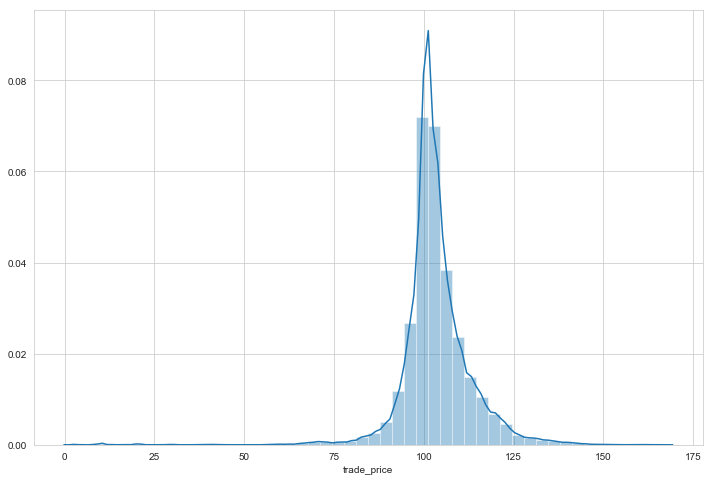

In [2]:
fig, axarr = plt.subplots(1, 1, figsize=(12, 8))
sns.distplot(df['trade_price'])
plt.close(2)

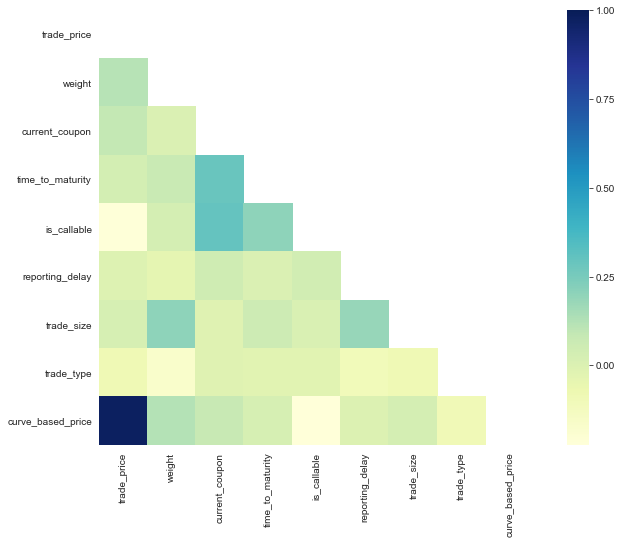

In [3]:
fig, axarr = plt.subplots(1, 1, figsize=(12, 8))
wh1 = df[['trade_price','weight',
'current_coupon',
'time_to_maturity',
'is_callable',
'reporting_delay',
'trade_size',
'trade_type',
'curve_based_price']] #Subsetting the data
cor = wh1.corr('spearman') #Calculate the correlation of the above variables
mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(cor, mask = mask,square = True, cmap="YlGnBu") #Plot the correlation as heat map

C:\Users\casocha\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


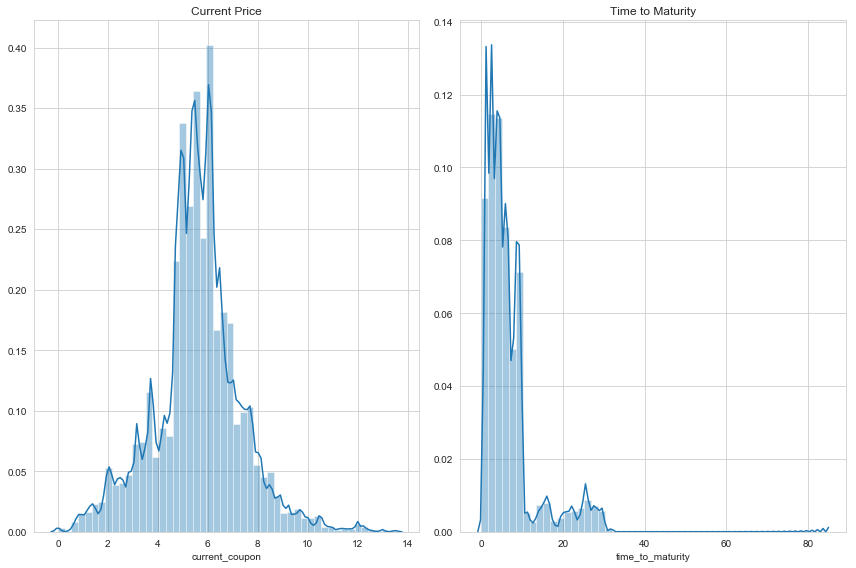

In [4]:
fig, axarr = plt.subplots(1, 2, figsize=(12, 8))

sns.distplot(df["current_coupon"], ax=axarr[0]);
axarr[0].set_title("Current Price")
sns.distplot(df["time_to_maturity"], ax=axarr[1]);
axarr[1].set_title("Time to Maturity")

plt.close(2)
plt.close(3)
plt.tight_layout()
#plt.yscale('log')
plt.show()

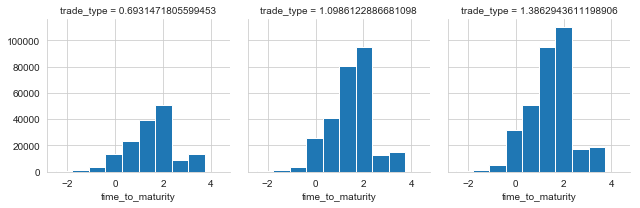

In [5]:
g = sns.FacetGrid(df.apply(np.log), col="trade_type")
g = g.map(plt.hist,'time_to_maturity')

In [6]:
df['Difference'] = df['trade_price'] - df['curve_based_price']
df_age = df.groupby('trade_type')[['Difference', 'reporting_delay']].median()
df_age.head()

,Difference,reporting_delay
trade_type,,
2,-0.326345,12.803
3,0.587792,10.045
4,0.069019,7.881


Customers buying, 3, have the largest reporting delay on average but when checking the median then customers that sell have largest value. Group 4 continues to have lowest

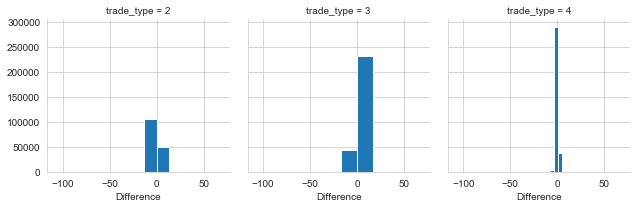

In [7]:
g = sns.FacetGrid(df, col="trade_type")
g = g.map(plt.hist,'Difference')

Customers that are buy get consistently the worst difference 

C:\Users\casocha\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\casocha\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\casocha\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


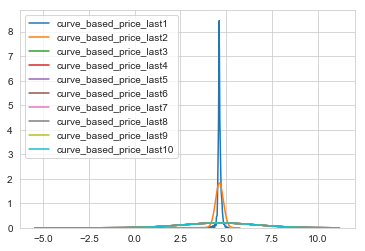

In [8]:
sns.kdeplot(df['curve_based_price_last1'].apply(np.log))
sns.kdeplot(df['curve_based_price_last2'].apply(np.log), bw=.2, label="curve_based_price_last2")
sns.kdeplot(df['curve_based_price_last3'].apply(np.log), bw=2, label="curve_based_price_last3")
sns.kdeplot(df['curve_based_price_last4'].apply(np.log), bw=2, label="curve_based_price_last4")
sns.kdeplot(df['curve_based_price_last5'].apply(np.log), bw=2, label="curve_based_price_last5")
sns.kdeplot(df['curve_based_price_last6'].apply(np.log), bw=2, label="curve_based_price_last6")
sns.kdeplot(df['curve_based_price_last7'].apply(np.log), bw=2, label="curve_based_price_last7")
sns.kdeplot(df['curve_based_price_last8'].apply(np.log), bw=2, label="curve_based_price_last8")
sns.kdeplot(df['curve_based_price_last9'].apply(np.log), bw=2, label="curve_based_price_last9")
sns.kdeplot(df['curve_based_price_last10'].apply(np.log), bw=2, label="curve_based_price_last10")

C:\Users\casocha\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\casocha\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\casocha\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


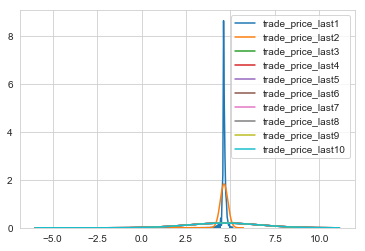

In [9]:
sns.kdeplot(df['trade_price_last1'].apply(np.log))
sns.kdeplot(df['trade_price_last2'].apply(np.log), bw=.2, label="trade_price_last2")
sns.kdeplot(df['trade_price_last3'].apply(np.log), bw=2, label="trade_price_last3")
sns.kdeplot(df['trade_price_last4'].apply(np.log), bw=2, label="trade_price_last4")
sns.kdeplot(df['trade_price_last5'].apply(np.log), bw=2, label="trade_price_last5")
sns.kdeplot(df['trade_price_last6'].apply(np.log), bw=2, label="trade_price_last6")
sns.kdeplot(df['trade_price_last7'].apply(np.log), bw=2, label="trade_price_last7")
sns.kdeplot(df['trade_price_last8'].apply(np.log), bw=2, label="trade_price_last8")
sns.kdeplot(df['trade_price_last9'].apply(np.log), bw=2, label="trade_price_last9")
sns.kdeplot(df['trade_price_last10'].apply(np.log), bw=2, label="trade_price_last10")

Text(0.5,1,'Trade Size')

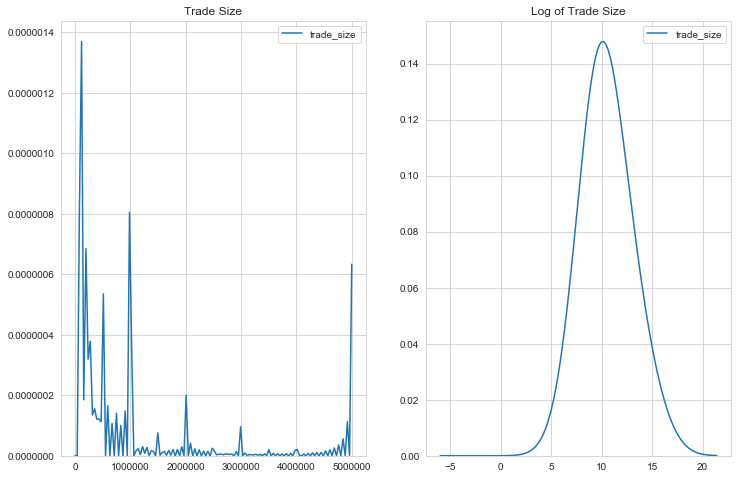

In [10]:
fig, axarr = plt.subplots(1, 2, figsize=(12, 8))
sns.kdeplot(df['trade_size'].apply(np.log), bw=2, label="trade_size",ax=axarr[1])
axarr[1].set_title("Log of Trade Size")

sns.kdeplot(df['trade_size'], bw=2, label="trade_size",ax=axarr[0])
axarr[0].set_title("Trade Size")

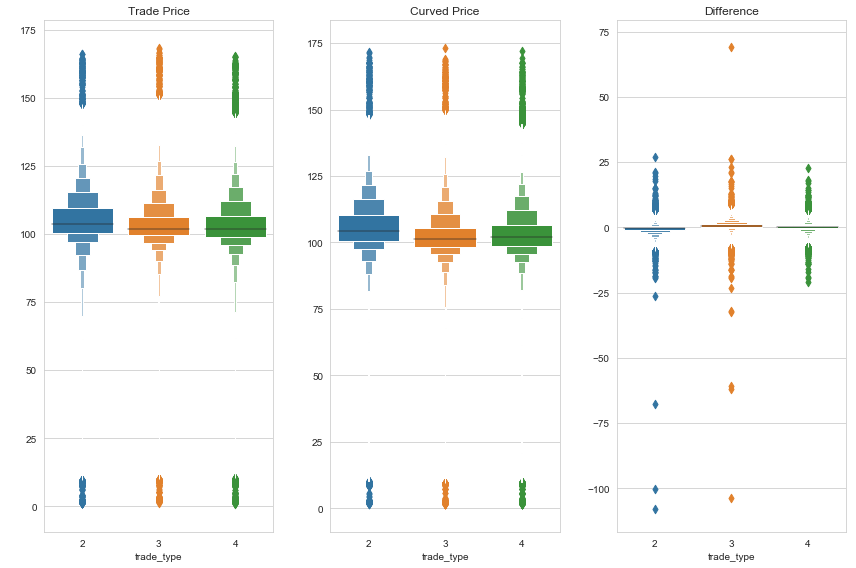

In [11]:
fig, axarr = plt.subplots(1, 3, figsize=(12, 8))
sns.catplot(x="trade_type", y="trade_price", kind="boxen",
            data=df,ax=axarr[0]);
axarr[0].set_title("Trade Price")
axarr[0].set_ylabel(' ')

sns.catplot(x="trade_type", y="curve_based_price", kind="boxen",
            data=df,ax=axarr[1]);
axarr[1].set_title("Curved Price")
axarr[1].set_ylabel(' ')

sns.catplot(x="trade_type", y="Difference", kind="boxen",
            data=df,ax=axarr[2]);
axarr[2].set_title("Difference")
axarr[2].set_ylabel(' ')
plt.close(2)
plt.close(3)
plt.close(4)
plt.tight_layout()
#plt.yscale('log')
plt.show()

C:\Users\casocha\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\casocha\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


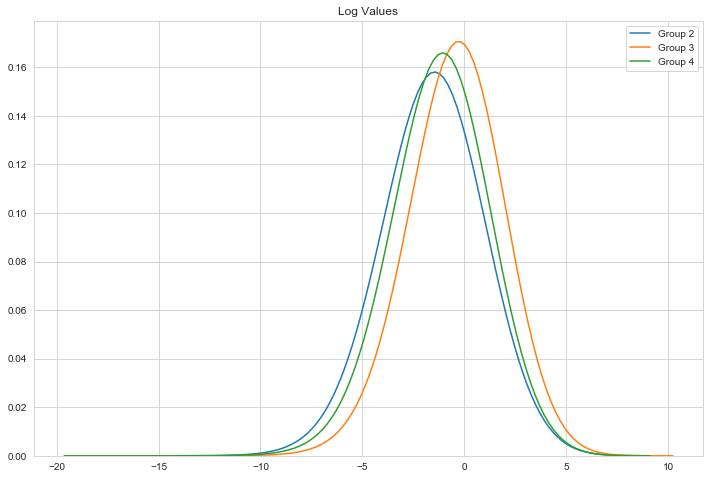

In [12]:
fig, axarr = plt.subplots(1, 1, figsize=(12, 8))
sns.kdeplot(df[df['trade_type']==2].loc[:,'Difference'].apply(np.log), bw=2, label="Group 2")
sns.kdeplot(df[df['trade_type']==3].loc[:,'Difference'].apply(np.log), bw=2, label="Group 3")
sns.kdeplot(df[df['trade_type']==4].loc[:,'Difference'].apply(np.log), bw=2, label="Group 4")
plt.title('Log Values')
plt.show()

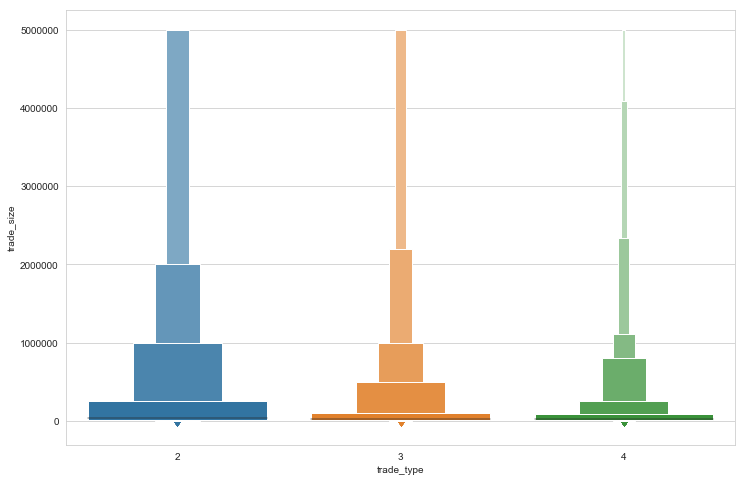

In [13]:
fig, axarr = plt.subplots(1, 1, figsize=(12, 8))
sns.catplot(x="trade_type", y="trade_size", kind="boxen",
            data=df,ax=axarr);
plt.close(2)

#### End of EDA

In [14]:
from sklearn.impute import MissingIndicator
indicator = MissingIndicator()
X1_tr = indicator.fit_transform(df)

#### Null treatment 

In [15]:
df['trade_avg'] = df[['trade_price_last1',
'trade_price_last2',
'trade_price_last3',
'trade_price_last4',
'trade_price_last5',
'trade_price_last6',
'trade_price_last7',
'trade_price_last8',
'trade_price_last9',
'trade_price_last10']].mean(axis=1)

df['curve_avg'] = df[['curve_based_price_last1',
'curve_based_price_last2',
'curve_based_price_last3',
'curve_based_price_last4',
'curve_based_price_last5',
'curve_based_price_last6',
'curve_based_price_last7',
'curve_based_price_last8',
'curve_based_price_last9',
'curve_based_price_last10']].mean(axis=1)

df['time_avg'] = df[['received_time_diff_last1',
'received_time_diff_last2',
'received_time_diff_last3',
'received_time_diff_last4',
'received_time_diff_last5',
'received_time_diff_last6',
'received_time_diff_last7',
'received_time_diff_last8',
'received_time_diff_last9',
'received_time_diff_last10']].mean(axis=1)

df['trade_size_avg'] = df[['trade_size_last1',
'trade_size_last2',
'trade_size_last3',
'trade_size_last4',
'trade_size_last5',
'trade_size_last6',
'trade_size_last7',
'trade_size_last8',
'trade_size_last9',
'trade_size_last10']].mean(axis=1)

In [16]:
#df.info()

In [17]:
df = df.fillna(-1)
df.head(10)

,id,bond_id,trade_price,weight,current_coupon,time_to_maturity,is_callable,reporting_delay,trade_size,trade_type,...,received_time_diff_last10,trade_price_last10,trade_size_last10,trade_type_last10,curve_based_price_last10,Difference,trade_avg,curve_avg,time_avg,trade_size_avg
0,1,1,128.596,11.316404,5.95,26.031126,0,1.731,120000,2,...,-1.0,-1.000,-1.0,-1.0,-1.000000,1.034799,129.089000,129.435587,7.587620e+05,2.000000e+05
1,2,1,126.673,8.763446,5.95,26.016697,0,30.518,85000,4,...,-1.0,-1.000,-1.0,-1.0,-1.000000,0.349472,128.842500,128.498394,8.344095e+05,1.600000e+05
2,3,1,126.880,6.499730,5.95,26.008760,0,4.424,4200000,3,...,-1.0,-1.000,-1.0,-1.0,-1.000000,0.118567,128.119333,127.773439,8.065833e+05,1.350000e+05
3,4,1,126.362,0.865854,5.95,26.008619,0,43.059,5000001,2,...,-1.0,-1.000,-1.0,-1.0,-1.000000,-0.663765,127.809500,127.520437,6.093792e+05,1.151250e+06
4,5,1,124.918,11.938543,5.95,25.981840,0,6.332,10000,2,...,-1.0,-1.000,-1.0,-1.0,-1.000000,-0.818082,127.520000,127.421503,1.331987e+06,1.921000e+06
5,6,1,128.891,1.479307,5.95,25.981429,0,35.982,29000,4,...,-1.0,-1.000,-1.0,-1.0,-1.000000,2.254921,127.086333,127.140599,1.122955e+06,1.602500e+06
6,7,1,126.061,10.155838,5.95,25.962051,0,12.601,220000,3,...,-1.0,-1.000,-1.0,-1.0,-1.000000,-0.119334,127.344143,127.068525,1.573645e+06,1.377714e+06
7,8,1,124.757,7.567823,5.95,25.951291,0,0.631,1000000,3,...,-1.0,-1.000,-1.0,-1.0,-1.000000,0.035047,127.183750,126.957501,1.716275e+06,1.233000e+06
8,9,1,125.101,0.469131,5.95,25.951249,0,2.091,400000,3,...,-1.0,-1.000,-1.0,-1.0,-1.000000,0.383392,126.914111,126.709107,1.526881e+06,1.207111e+06
9,10,1,126.268,7.616851,5.95,25.940349,0,12.540,150000,3,...,3621492.0,129.089,200000.0,2.0,129.435587,0.250637,126.732800,126.509957,1.717940e+06,1.126400e+06


In [18]:
def nullReplace(s):
    if s.trade_price_last5 == -1:
        s[['trade_price_last5',
        'trade_price_last6',
        'trade_price_last7',
        'trade_price_last8',
        'trade_price_last9',
        'trade_price_last10']] = s.trade_avg  
        
        s[['trade_size_last5',
        'trade_size_last6',
        'trade_size_last7',
        'trade_size_last8',
        'trade_size_last9',
        'trade_size_last10']] = s.trade_size_avg
        
        s[['curve_based_price_last5',
        'curve_based_price_last6',
        'curve_based_price_last7',
        'curve_based_price_last8',
        'curve_based_price_last9',
        'curve_based_price_last10']] = s.curve_avg
            
        s[['received_time_diff_last5',
        'received_time_diff_last6',
        'received_time_diff_last7',
        'received_time_diff_last8',
        'received_time_diff_last9',
        'received_time_diff_last10']] = s.time_avg
        
        return s
    return s

In [19]:
df = df.apply(lambda s: nullReplace(s) if s.trade_price_last4 != -1 else s, axis=1)

#### Package Imports

In [20]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#### Transform Data

In [21]:
Y = df['trade_price']
final_df = df.set_index('id')
X = final_df.drop(['trade_price','bond_id'],axis=1)

In [22]:
X_num = X.drop(['is_callable','trade_type'],axis=1)
numeric_features = X_num.columns.values
categoric_features = ['is_callable','trade_type']

In [23]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names=attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [24]:
numeric_transformer = Pipeline(steps=[
    ('selector', DataFrameSelector(numeric_features)),
    #('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())])

categorical_transformer = Pipeline(steps=[
    ('selector', DataFrameSelector(categoric_features)),
    #('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", numeric_transformer),
        ("cat_pipeline", categorical_transformer),
    ])

#### Split Data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

#### Model

In [26]:
clf = Pipeline(steps=[('preprocessor', full_pipeline),
                      ('classifier', RandomForestRegressor(max_depth = 5))])

In [27]:
clf.fit(X_train, y_train) 

C:\Users\casocha\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
     steps=[('preprocessor', FeatureUnion(n_jobs=None,
       transformer_list=[('num_pipeline', Pipeline(memory=None,
     steps=[('selector', DataFrameSelector(attribute_names=array(['weight', 'current_coupon', 'time_to_maturity', 'reporting_delay',
       'trade_size', 'curve_based_price', 'received_t...ators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])

In [28]:
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.983


In [29]:
print("model score: %.3f" % clf.score(X_val, y_val))

model score: 0.984
